In [30]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import numpy as np

In [9]:
# ELM

# Define the file path and pattern to match the CSV files
file_path = "C:/Users/aaltiere2023/Documents/ELMTower"
file_pattern = os.path.join(file_path, "*.csv")

# Latitude and longitude values to add
latitude = 25.5519
longitude = -80.7826

# Get a list of all CSV files matching the pattern
csv_files = glob.glob(file_pattern)

# Check if any CSV files were found
if not csv_files:
    raise ValueError("No CSV files found in the specified directory.")

# Initialize an empty list to store DataFrames
dfs = []

# Loop through the CSV files and read each one into a DataFrame
for file in csv_files:
    try:
        df = pd.read_csv(file)
        if "FC" in df.columns and "TA_F" in df.columns:
            # Add latitude and longitude columns
            df["Lat"] = latitude
            df["Long"] = longitude
            dfs.append(df)
        else:
            print(f"Skipping file {file} as it does not contain the required columns.")
    except Exception as e:
        print(f"Error reading {file}: {e}")

# Check if any DataFrames were successfully read
if not dfs:
    raise ValueError("No valid DataFrames to concatenate. Check the files for the required columns.")

# Concatenate all DataFrames
merged_df = pd.concat(dfs, ignore_index=True)

# Select only the columns "FC", "TA_F", "Lat", and "Long"
filtered_df = merged_df[["FC", "TA_F", "Lat", "Long"]]

# Export the final DataFrame to a single CSV file
output_file = os.path.join(file_path, "merged_filtered_with_lat_long.csv")
filtered_df.to_csv(output_file, index=False)

print(f"Exported merged and filtered data with lat and long to {output_file}")

Exported merged and filtered data with lat and long to C:/Users/aaltiere2023/Documents/ELMTower\merged_filtered_with_lat_long.csv


In [10]:
# ESM

# Define the file path and pattern to match the CSV files
file_path = "C:/Users/aaltiere2023/Documents/ESMTower"
file_pattern = os.path.join(file_path, "*.csv")

# Latitude and longitude values to add
latitude = 	25.4379
longitude = -80.5946

# Get a list of all CSV files matching the pattern
csv_files = glob.glob(file_pattern)

# Check if any CSV files were found
if not csv_files:
    raise ValueError("No CSV files found in the specified directory.")

# Initialize an empty list to store DataFrames
dfs = []

# Loop through the CSV files and read each one into a DataFrame
for file in csv_files:
    try:
        df = pd.read_csv(file)
        if "FC" in df.columns and "TA_F" in df.columns:
            # Add latitude and longitude columns
            df["Lat"] = latitude
            df["Long"] = longitude
            dfs.append(df)
        else:
            print(f"Skipping file {file} as it does not contain the required columns.")
    except Exception as e:
        print(f"Error reading {file}: {e}")

# Check if any DataFrames were successfully read
if not dfs:
    raise ValueError("No valid DataFrames to concatenate. Check the files for the required columns.")

# Concatenate all DataFrames
merged_df = pd.concat(dfs, ignore_index=True)

# Select only the columns "FC", "TA_F", "Lat", and "Long"
filtered_df = merged_df[["FC", "TA_F", "Lat", "Long"]]

# Export the final DataFrame to a single CSV file
output_file = os.path.join(file_path, "merged_filtered_with_lat_long.csv")
filtered_df.to_csv(output_file, index=False)

print(f"Exported merged and filtered data with lat and long to {output_file}")

Exported merged and filtered data with lat and long to C:/Users/aaltiere2023/Documents/ESMTower\merged_filtered_with_lat_long.csv


In [16]:
# EVM

# Define the file path for the single CSV file
single_file_path = "C:/Users/aaltiere2023/Documents/EVMTower/US-EvM_2020_2022.csv"

# Latitude and longitude values to add
latitude = 25.5519
longitude = -80.7826

# Check if the file exists
if not os.path.exists(single_file_path):
    raise ValueError(f"File {single_file_path} not found.")

try:
    # Read the single CSV file into a DataFrame
    df = pd.read_csv(single_file_path)
    
    # Check if the required columns are present
    if "FC" in df.columns and "TA" in df.columns:
        # Add latitude and longitude columns
        df["Lat"] = latitude
        df["Long"] = longitude
        
        # Select only the columns "FC", "TA", "Lat", and "Long"
        filtered_df = df[["FC", "TA", "Lat", "Long"]]
        
        # Export the final DataFrame to a new CSV file
        output_file = os.path.join(os.path.dirname(single_file_path), "filtered_with_lat_long.csv")
        filtered_df.to_csv(output_file, index=False)
        
        print(f"Exported filtered data with lat and long to {output_file}")
    else:
        print(f"The file does not contain the required columns 'FC' and 'TA_F'.")
except Exception as e:
    print(f"Error reading {single_file_path}: {e}")

Exported filtered data with lat and long to C:/Users/aaltiere2023/Documents/EVMTower\filtered_with_lat_long.csv


In [17]:
# TAS

# Define the file path for the single CSV file
single_file_path = "C:/Users/aaltiere2023/Documents/TASTower/US-TaS_2016_2023.csv"

# Latitude and longitude values to add
latitude = 25.1908
longitude = -80.6391

# TA column patterns to average
ta_columns = ["TA_1_1_1", "TA_1_2_1", "TA_1_3_1"]

# Check if the file exists
if not os.path.exists(single_file_path):
    raise ValueError(f"File {single_file_path} not found.")

try:
    # Read the single CSV file into a DataFrame
    df = pd.read_csv(single_file_path)
    
    # Check if the required columns are present
    if "FC" in df.columns and all(col in df.columns for col in ta_columns):
        # Calculate the average of the TA columns
        df["TA"] = df[ta_columns].mean(axis=1)
        
        # Add latitude and longitude columns
        df["Lat"] = latitude
        df["Long"] = longitude
        
        # Select only the columns "FC", "TA", "Lat", and "Long"
        filtered_df = df[["FC", "TA", "Lat", "Long"]]
        
        # Export the final DataFrame to a new CSV file
        output_file = os.path.join(os.path.dirname(single_file_path), "filtered_with_lat_long.csv")
        filtered_df.to_csv(output_file, index=False)
        
        print(f"Exported filtered data with averaged TA, lat, and long to {output_file}")
    else:
        print(f"The file does not contain the required columns 'FC' and one or more of the TA columns: {ta_columns}.")
except Exception as e:
    print(f"Error reading {single_file_path}: {e}")

Exported filtered data with averaged TA, lat, and long to C:/Users/aaltiere2023/Documents/TASTower\filtered_with_lat_long.csv


In [19]:
# XDS

# Define the file path for the single CSV file
single_file_path = "C:/Users/aaltiere2023/Documents/XDSTower/US-xDS_2017_2022.csv"

# Latitude and longitude values to add
latitude = 	28.1250
longitude = -81.4362

# TA column patterns to average
ta_columns = ["TA_1_1_1", "TA_1_1_2", "TA_1_2_1", "TA_1_3_1", "TA_1_4_1"]

# Check if the file exists
if not os.path.exists(single_file_path):
    raise ValueError(f"File {single_file_path} not found.")

try:
    # Read the single CSV file into a DataFrame
    df = pd.read_csv(single_file_path)
    
    # Check if the required columns are present
    if "FC" in df.columns and all(col in df.columns for col in ta_columns):
        # Calculate the average of the TA columns
        df["TA"] = df[ta_columns].mean(axis=1)
        
        # Add latitude and longitude columns
        df["Lat"] = latitude
        df["Long"] = longitude
        
        # Select only the columns "FC", "TA", "Lat", and "Long"
        filtered_df = df[["FC", "TA", "Lat", "Long"]]
        
        # Export the final DataFrame to a new CSV file
        output_file = os.path.join(os.path.dirname(single_file_path), "filtered_with_lat_long.csv")
        filtered_df.to_csv(output_file, index=False)
        
        print(f"Exported filtered data with averaged TA, lat, and long to {output_file}")
    else:
        print(f"The file does not contain the required columns 'FC' and one or more of the TA columns: {ta_columns}.")
except Exception as e:
    print(f"Error reading {single_file_path}: {e}")

Exported filtered data with averaged TA, lat, and long to C:/Users/aaltiere2023/Documents/XDSTower\filtered_with_lat_long.csv


In [30]:

# Define the file path for the single CSV file
single_file_path = "C:/Users/aaltiere2023/Documents/XDSTower/US-xDS_2017_2022.csv"

# Define the output file path
output_file_path = "C:/Users/aaltiere2023/Documents/XDSTower/simplified_temperature_data.csv"

# TA column patterns to analyze
ta_columns = ["TA_1_1_1", "TA_1_1_2", "TA_1_2_1", "TA_1_3_1", "TA_1_4_1"]

# Check if the file exists
if not os.path.exists(single_file_path):
    raise ValueError(f"File {single_file_path} not found.")

try:
    # Read the single CSV file into a DataFrame
    df = pd.read_csv(single_file_path)
    
    # Standardize the column names by stripping leading/trailing whitespaces
    df.columns = df.columns.str.strip()
    
    # Initial inspection of the DataFrame
    print(f"Initial DataFrame head:\n{df.head()}")
    print(f"Initial DataFrame columns:\n{df.columns}")
    print(f"Initial DataFrame shape: {df.shape}")
    
    # Check if the required columns are present
    if all(col in df.columns for col in ta_columns + ["TIMESTAMP_START"]):
        # Select only the relevant columns
        df_simplified = df[["TIMESTAMP_START"] + ta_columns]
        
        # Final inspection before exporting
        print(f"Simplified DataFrame head:\n{df_simplified.head()}")
        print(f"Simplified DataFrame shape: {df_simplified.shape}")
        
        # Export the simplified DataFrame to a CSV file
        df_simplified.to_csv(output_file_path, index=False)
        
        print(f"Simplified data exported to {output_file_path}.")
    else:
        missing_cols = [col for col in ta_columns + ["TIMESTAMP_START"] if col not in df.columns]
        print(f"The file does not contain the required columns: {missing_cols}.")
except Exception as e:
    print(f"Error reading {single_file_path}: {e}")


Initial DataFrame head:
   TIMESTAMP_START  TIMESTAMP_END  CO2_MIXING_RATIO_1_1_1  \
0     2.017010e+11   2.017010e+11                 -9999.0   
1     2.017010e+11   2.017010e+11                 -9999.0   
2     2.017010e+11   2.017010e+11                 -9999.0   
3     2.017010e+11   2.017010e+11                 -9999.0   
4     2.017010e+11   2.017010e+11                 -9999.0   

   H2O_MIXING_RATIO_1_1_1  CO2_MIXING_RATIO_1_1_2  H2O_MIXING_RATIO_1_1_2  \
0                 -9999.0                 -9999.0                 -9999.0   
1                 -9999.0                 -9999.0                 -9999.0   
2                 -9999.0                 -9999.0                 -9999.0   
3                 -9999.0                 -9999.0                 -9999.0   
4                 -9999.0                 -9999.0                 -9999.0   

   CO2_MIXING_RATIO_1_1_3  CH4_MIXING_RATIO_1_1_1  H2O_MIXING_RATIO_1_1_3  \
0                 -9999.0                 -9999.0                   -

In [2]:
import pandas as pd

# File path
file_path = 'C:/Users/aaltiere2023/Documents/XDSTower/simplified_temperature_data.csv'
output_file_path = 'C:/Users/aaltiere2023/Documents/XDSTower/corrected_temperature_data.csv'

# Step 1: Read CSV file
df = pd.read_csv(file_path)

# Step 2: Convert TIMESTAMP_START column from float to string, then pad with zeros
df['TIMESTAMP_START'] = df['TIMESTAMP_START'].astype(str).str.zfill(12)

# Step 3: Function to convert 'YYYYMMDDHHMM' format to datetime
def convert_to_datetime(timestamp_str):
    try:
        return pd.to_datetime(timestamp_str, format='%Y%m%d%H%M')
    except ValueError:
        return pd.NaT  # Return NaT if conversion fails

# Apply the conversion function
df['TIMESTAMP_START'] = df['TIMESTAMP_START'].apply(convert_to_datetime)

# Step 4: Create Year-Month column
df['YearMonth'] = df['TIMESTAMP_START'].dt.strftime('%Y-%m')

# Step 5: Export the DataFrame to a new CSV file
df.to_csv(output_file_path, index=False)

print(f"New CSV file saved: {output_file_path}")


New CSV file saved: C:/Users/aaltiere2023/Documents/XDSTower/corrected_temperature_data.csv


In [3]:
import pandas as pd

# File path
file_path = 'C:/Users/aaltiere2023/Documents/XDSTower/simplified_temperature_data.csv'

# Read CSV file
df = pd.read_csv(file_path)

# Display the data type of the TIMESTAMP_START column
print(df['TIMESTAMP_START'].dtype)


int64


In [4]:
# Read CSV file
df = pd.read_csv(file_path)

# Display the data type of the TIMESTAMP_START column
timestamp_type = df['TIMESTAMP_START'].dtype
print(f"Data type of TIMESTAMP_START column: {timestamp_type}")

# Convert int64 to string (if necessary)
# Assuming the column is already in the format YYYYMMDDHHMM
df['TIMESTAMP_START'] = df['TIMESTAMP_START'].astype(str)

# Example function to extract components
def extract_components(timestamp_str):
    # Example: Extract year and month
    year = timestamp_str[:4]
    month = timestamp_str[4:6]
    return f"Year: {year}, Month: {month}"

# Apply function to TIMESTAMP_START column
df['Components'] = df['TIMESTAMP_START'].apply(extract_components)

# Display first few rows to verify
print(df.head())

# Save modified DataFrame to a new CSV file
df.to_csv(output_file_path, index=False)

print(f"New CSV file saved: {output_file_path}")


Data type of TIMESTAMP_START column: int64
  TIMESTAMP_START  TA_1_1_1  TA_1_1_2  TA_1_2_1  TA_1_3_1  TA_1_4_1  \
0    201701000000   -9999.0   -9999.0   -9999.0   -9999.0   -9999.0   
1    201701000000   -9999.0   -9999.0   -9999.0   -9999.0   -9999.0   
2    201701000000   -9999.0   -9999.0   -9999.0   -9999.0   -9999.0   
3    201701000000   -9999.0   -9999.0   -9999.0   -9999.0   -9999.0   
4    201701000000   -9999.0   -9999.0   -9999.0   -9999.0   -9999.0   

              Components  
0  Year: 2017, Month: 01  
1  Year: 2017, Month: 01  
2  Year: 2017, Month: 01  
3  Year: 2017, Month: 01  
4  Year: 2017, Month: 01  
New CSV file saved: C:/Users/aaltiere2023/Documents/XDSTower/corrected_temperature_data.csv


In [5]:
# File path
file_path = 'C:/Users/aaltiere2023/Documents/XDSTower/corrected_temperature_data.csv'

# Read CSV file
df = pd.read_csv(file_path)

# Display the first few rows to inspect the 'Components' column
print(df.head())

# Split 'Components' column into 'Year' and 'Month' columns
df[['Year', 'Month']] = df['Components'].str.extract(r'Year: (\d+), Month: (\d+)')

# Convert 'Year' and 'Month' columns to integers
df['Year'] = df['Year'].astype(int)
df['Month'] = df['Month'].astype(int)

# Display the updated DataFrame
print(df.head())

# Save modified DataFrame to a new CSV file
output_file_path = 'C:/Users/aaltiere2023/Documents/XDSTower/extracted_year_month.csv'
df.to_csv(output_file_path, index=False)

print(f"New CSV file saved: {output_file_path}")


   TIMESTAMP_START  TA_1_1_1  TA_1_1_2  TA_1_2_1  TA_1_3_1  TA_1_4_1  \
0     201701000000   -9999.0   -9999.0   -9999.0   -9999.0   -9999.0   
1     201701000000   -9999.0   -9999.0   -9999.0   -9999.0   -9999.0   
2     201701000000   -9999.0   -9999.0   -9999.0   -9999.0   -9999.0   
3     201701000000   -9999.0   -9999.0   -9999.0   -9999.0   -9999.0   
4     201701000000   -9999.0   -9999.0   -9999.0   -9999.0   -9999.0   

              Components  
0  Year: 2017, Month: 01  
1  Year: 2017, Month: 01  
2  Year: 2017, Month: 01  
3  Year: 2017, Month: 01  
4  Year: 2017, Month: 01  
   TIMESTAMP_START  TA_1_1_1  TA_1_1_2  TA_1_2_1  TA_1_3_1  TA_1_4_1  \
0     201701000000   -9999.0   -9999.0   -9999.0   -9999.0   -9999.0   
1     201701000000   -9999.0   -9999.0   -9999.0   -9999.0   -9999.0   
2     201701000000   -9999.0   -9999.0   -9999.0   -9999.0   -9999.0   
3     201701000000   -9999.0   -9999.0   -9999.0   -9999.0   -9999.0   
4     201701000000   -9999.0   -9999.0   -999

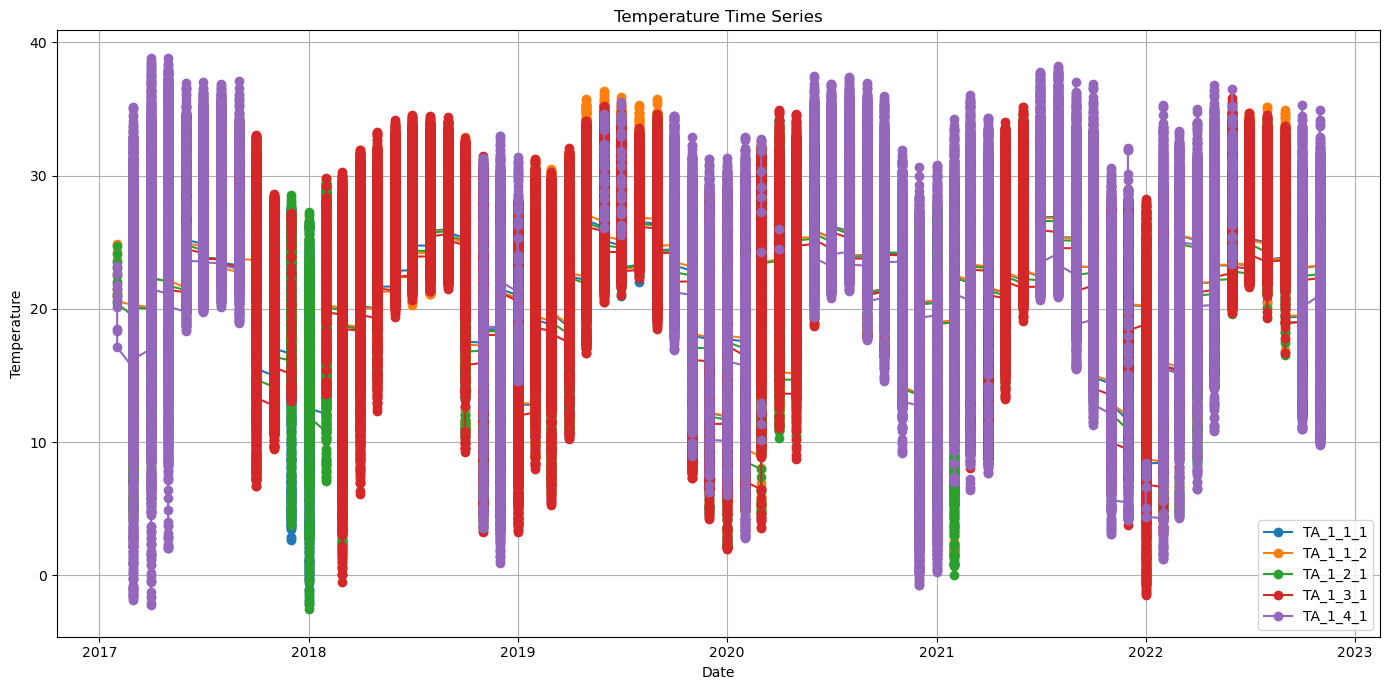

In [15]:
# Replace -9999 with NaN in temperature columns
temperature_columns = ['TA_1_1_1', 'TA_1_1_2', 'TA_1_2_1', 'TA_1_3_1', 'TA_1_4_1']
df[temperature_columns] = df[temperature_columns].replace(-9999, np.nan)

# Convert 'Year' and 'Month' to datetime format
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))

# Prepare data for analysis
# Convert temperature columns to numeric (if necessary)
df[temperature_columns] = df[temperature_columns].apply(pd.to_numeric, errors='coerce')

# Line plot for temperature time series
plt.figure(figsize=(14, 7))

# Plot each temperature column as a line
for col in temperature_columns:
    plt.plot(df['Date'], df[col], label=col, marker='o', linestyle='-')

plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Temperature Time Series')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

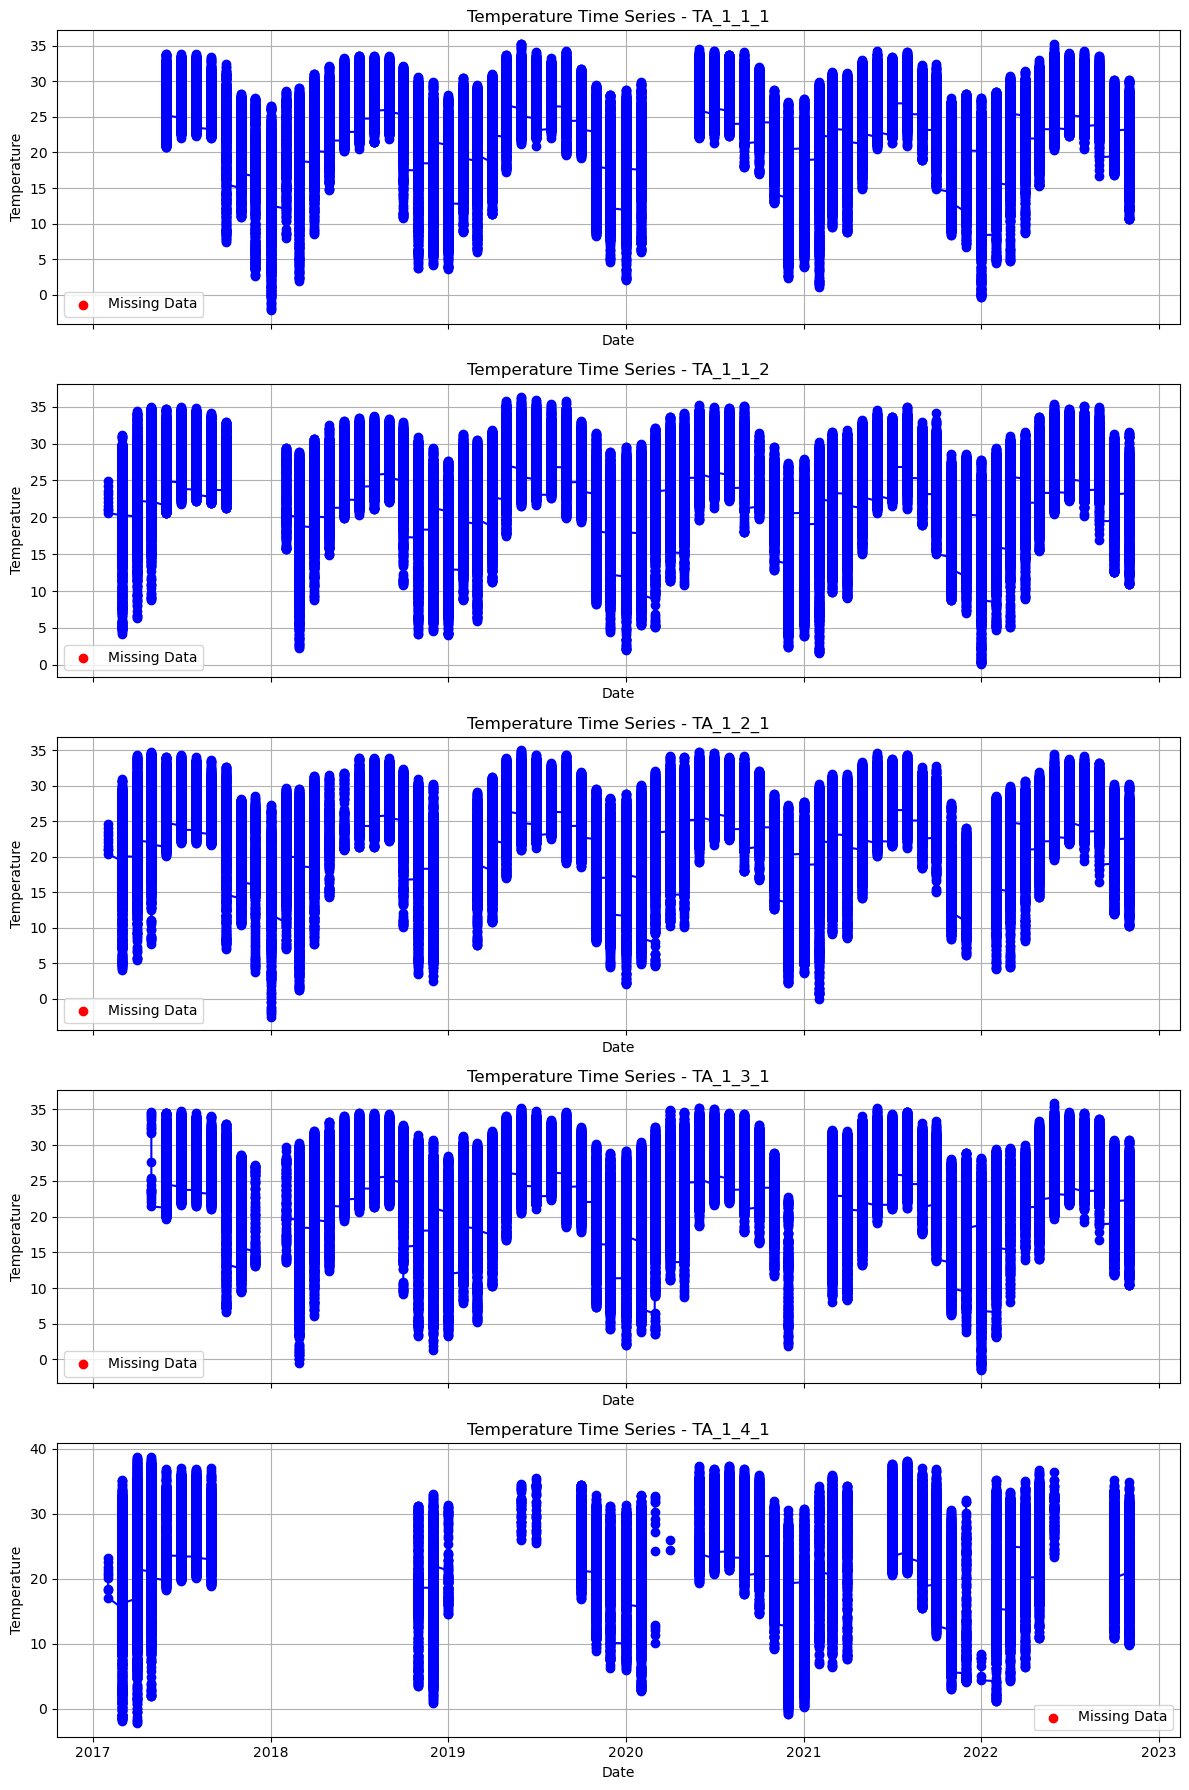

In [16]:
# Replace -9999 with NaN in temperature columns
temperature_columns = ['TA_1_1_1', 'TA_1_1_2', 'TA_1_2_1', 'TA_1_3_1', 'TA_1_4_1']
df[temperature_columns] = df[temperature_columns].replace(-9999, np.nan)

# Convert 'Year' and 'Month' to datetime format
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))

# Prepare data for analysis
# Convert temperature columns to numeric (if necessary)
df[temperature_columns] = df[temperature_columns].apply(pd.to_numeric, errors='coerce')

# Create individual plots for each temperature column
fig, axes = plt.subplots(len(temperature_columns), 1, figsize=(12, 18), sharex=True)

for i, col in enumerate(temperature_columns):
    ax = axes[i]
    ax.plot(df['Date'], df[col], marker='o', linestyle='-', color='b')
    ax.set_xlabel('Date')
    ax.set_ylabel('Temperature')
    ax.set_title(f'Temperature Time Series - {col}')
    ax.grid(True)
    
    # Highlight missing values (NaNs)
    missing_dates = df[df[col].isna()]['Date']
    if not missing_dates.empty:
        ax.scatter(missing_dates, df.loc[df[col].isna(), col], color='red', label='Missing Data')
    
    ax.legend()

plt.tight_layout()
plt.show()


C:\Users\aaltiere2023\AppData\Local\Temp\ipykernel_17224\849324252.py:22: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.boxplot(column=temperature_columns, by='Date', ax=plt.gca())


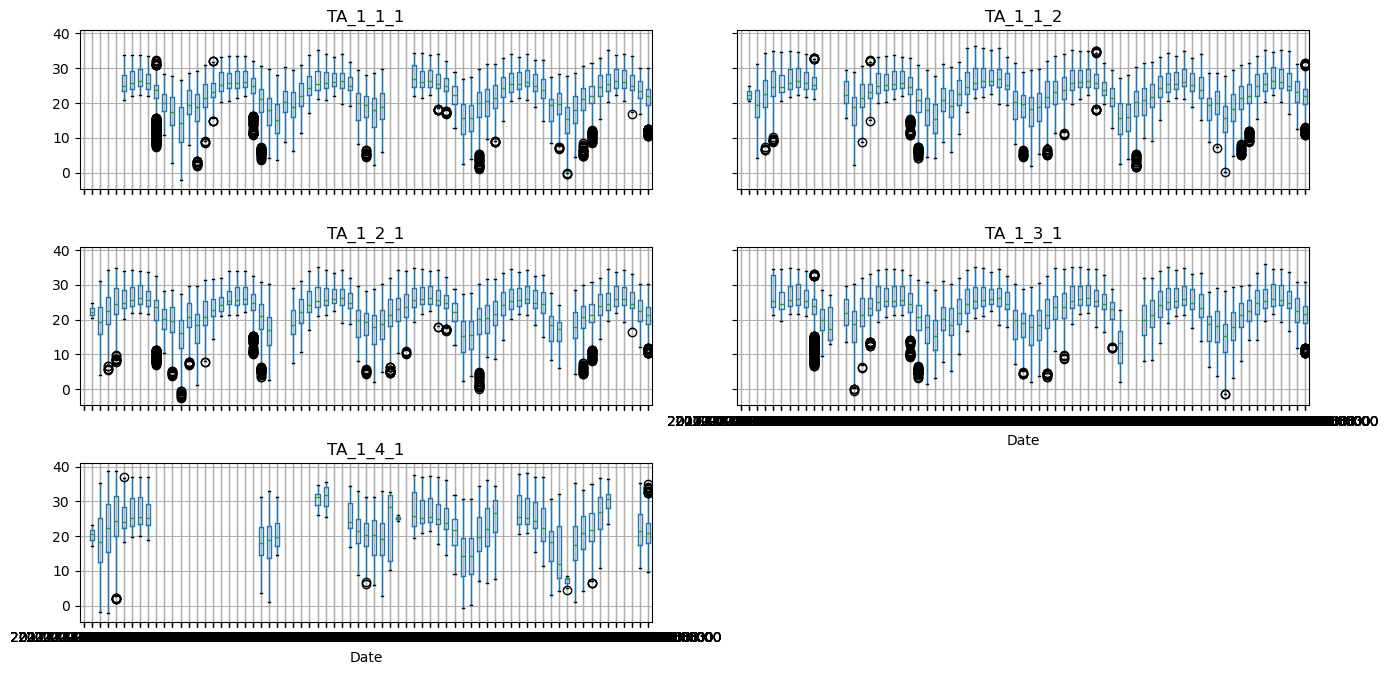

In [9]:
# File path
file_path = 'C:/Users/aaltiere2023/Documents/XDSTower/extracted_year_month.csv'

# Step 1: Read the updated CSV file
df = pd.read_csv(file_path)

# Step 2: Replace -9999 with NaN in temperature columns
temperature_columns = ['TA_1_1_1', 'TA_1_1_2', 'TA_1_2_1', 'TA_1_3_1', 'TA_1_4_1']
df[temperature_columns] = df[temperature_columns].replace(-9999, np.nan)

# Step 3: Convert 'Year' and 'Month' to datetime format
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))

# Step 4: Prepare data for analysis
# Convert temperature columns to numeric (if necessary)
df[temperature_columns] = df[temperature_columns].apply(pd.to_numeric, errors='coerce')

# Step 5: Box plot for temperature variability over time
plt.figure(figsize=(14, 7))

# Create box plots for each temperature column
df.boxplot(column=temperature_columns, by='Date', ax=plt.gca())

plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Temperature Variability Over Time')
plt.suptitle('')  # Suppress default title
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\aaltiere2023\AppData\Local\Temp\ipykernel_17224\2459393734.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Mean_Temperature'] = df_cleaned[temperature_columns].mean(axis=1)
C:\Users\aaltiere2023\AppData\Local\Temp\ipykernel_17224\2459393734.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Month_Year'] = df_cleaned['Date'].dt.to_period('M')


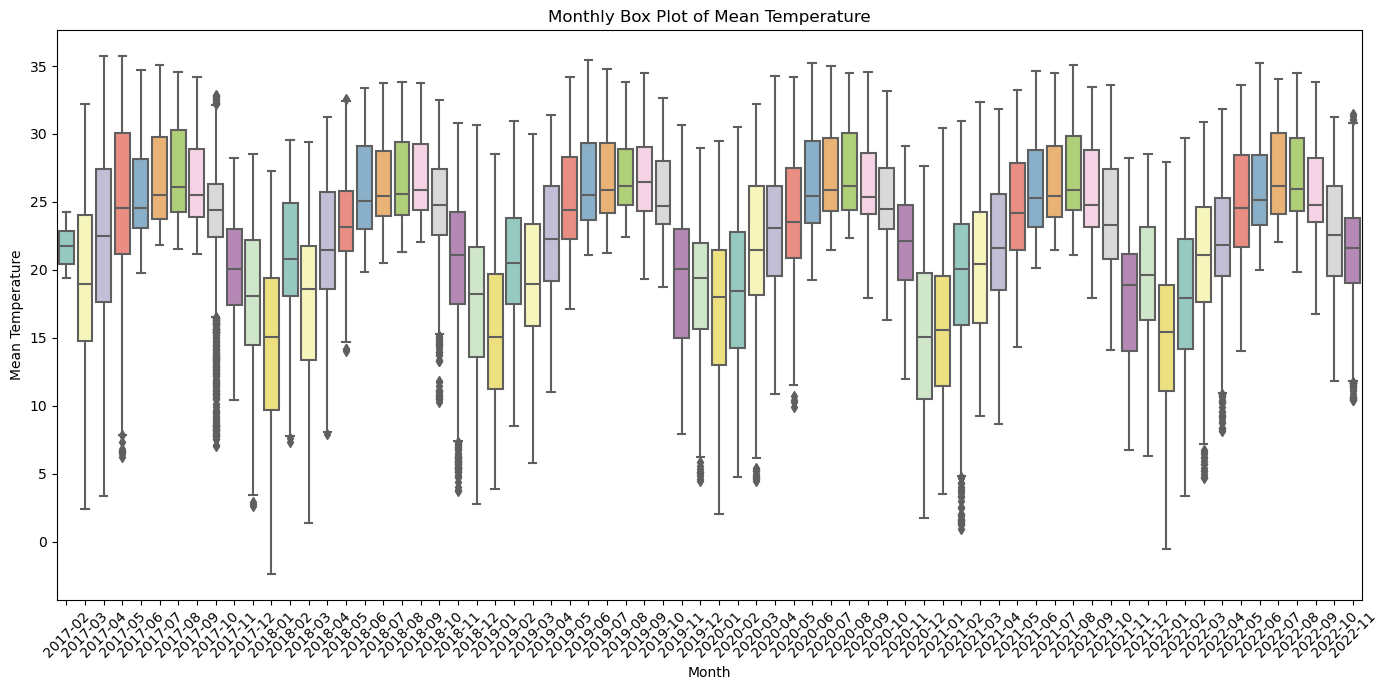

In [23]:
import seaborn as sns

# Replace -9999 with NaN in temperature columns
temperature_columns = ['TA_1_1_1', 'TA_1_1_2', 'TA_1_2_1', 'TA_1_3_1', 'TA_1_4_1']
df[temperature_columns] = df[temperature_columns].replace(-9999, np.nan)

# Convert 'Year' and 'Month' to datetime format
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))

# Prepare data for analysis
# Convert temperature columns to numeric (if necessary)
df[temperature_columns] = df[temperature_columns].apply(pd.to_numeric, errors='coerce')

# Strip all -9999 values and calculate mean of temperature columns
# Drop rows where all temperature columns are NaN
df_cleaned = df.dropna(subset=temperature_columns, how='all')

# Calculate mean temperature for each month
df_cleaned['Mean_Temperature'] = df_cleaned[temperature_columns].mean(axis=1)

# Create a month-year column for sorting purposes
df_cleaned['Month_Year'] = df_cleaned['Date'].dt.to_period('M')

# Plot monthly box plots
plt.figure(figsize=(14, 7))
sns.boxplot(x='Month_Year', y='Mean_Temperature', data=df_cleaned, palette='Set3')
plt.xlabel('Month')
plt.ylabel('Mean Temperature')
plt.title('Monthly Box Plot of Mean Temperature')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
